In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

In [3]:
# Read in data
train = pd.read_csv('./train.csv')
train = train.set_index('PassengerId')
test = pd.read_csv('./test.csv')
test = test.set_index('PassengerId')

In [4]:
# Get rid of null values
train = train[train['Age'].notnull()]
train = train[train['Cabin'].notnull()]
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


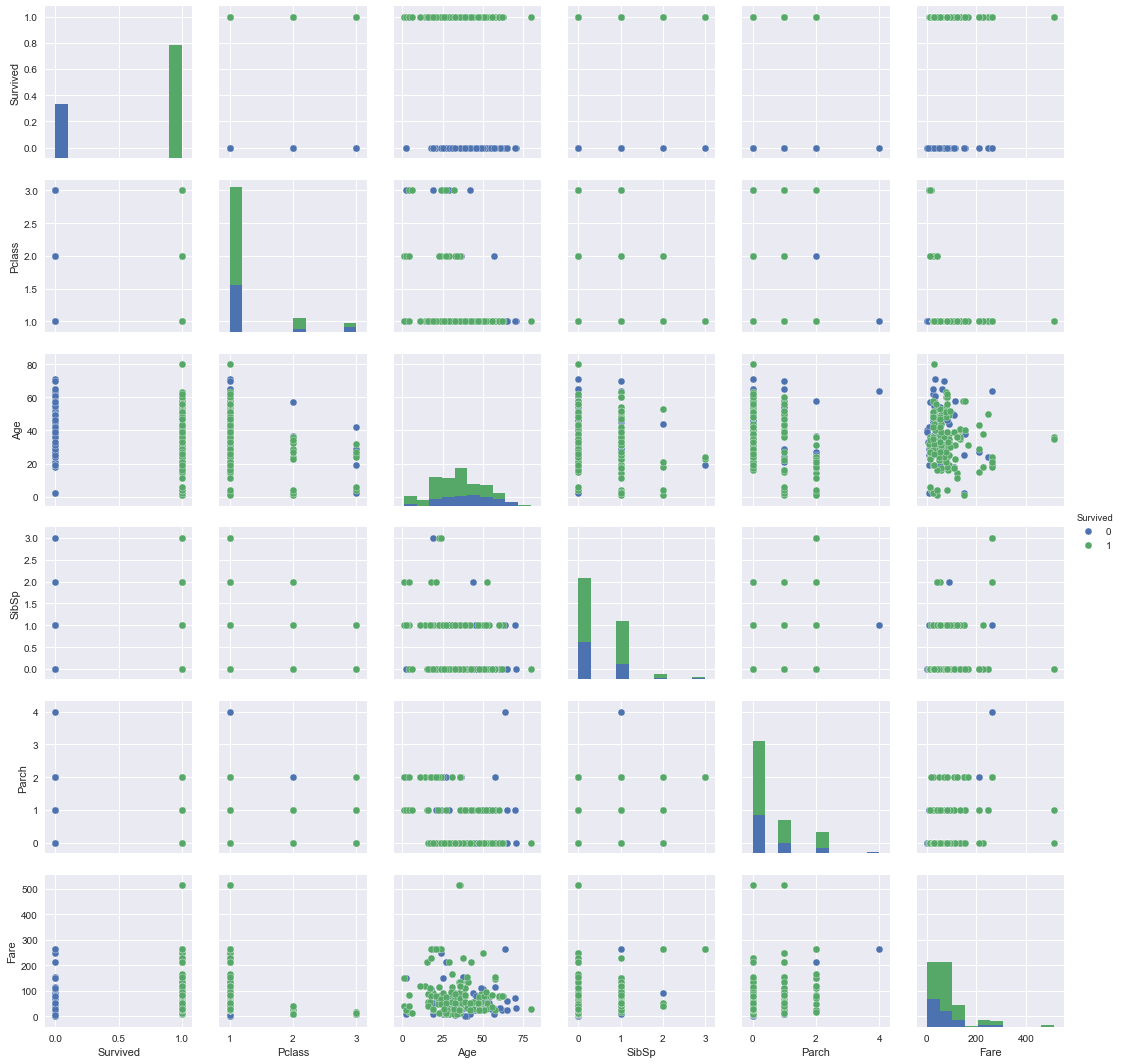

In [91]:
sns.pairplot(train, hue='Survived') 


In [5]:
def assign_port(port_code):
    """
    Add port names in place of ports.
    These port names will become column headers once the variable
    is converted to dummies
    """
    if port_code == 'S':
        return 'Southampton'
    elif port_code == 'C':
        return 'Cherbourg'
    elif port_code == 'Q':
        return 'Queenstown'
    else:
        return np.nan

# apply the function for port names and split to dummy variables 
port_embarked = train['Embarked'].apply(assign_port)
port_embarkation = pd.get_dummies(port_embarked, prefix = 'Embarked', drop_first = True)

# Grab the first character of the cabin, this indicates deck number
def assign_deck(cabin_code):
    return cabin_code[:1]
deck = train['Cabin'].apply(assign_deck)
deck = pd.get_dummies(deck, prefix = 'Deck', drop_first = True)

# Apply the class dummy variables
classes = pd.get_dummies(train['Pclass'], prefix = 'class', drop_first = True)

# Sex
sex = pd.get_dummies(train['Sex'], drop_first = True)

# Merge the results of all to get the final dataframe ready for analysis
X = train.drop(['Pclass', 'Embarked', 'Survived', 'Cabin', 'Name', 'Sex', 'Ticket'], axis = 1)
X = pd.merge(X, classes, left_index=True, right_index=True)
X = pd.merge(X, port_embarkation, left_index=True, right_index=True)
X = pd.merge(X, deck, left_index=True, right_index=True)
X = pd.merge(X, sex, left_index=True, right_index=True)

y = train['Survived']

In [6]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = PCA(n_components=2)
model.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
model.predict(X_test)

AttributeError: 'PCA' object has no attribute 'predict'

0.623333333333
0.573333333333
0.696666666667
0.66
0.66
0.663333333333
0.683333333333
0.64
0.676666666667
0.64
0.693333333333
0.66
0.676666666667
0.676666666667
0.676666666667
0.696666666667
0.713333333333
0.693333333333
0.693333333333


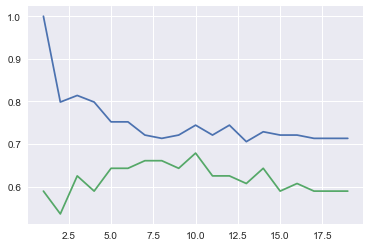

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

neighbors = np.arange(1, 20)
train_scores = np.empty(len(neighbors))
test_scores = np.empty(len(neighbors))
# Optimise that knnc
for ind, nbs in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=nbs)
    knn.fit(X_train, y_train)
    train_scores[ind] = knn.score(X_train, y_train)
    test_scores[ind] = knn.score(X_test, y_test)
#     Not sure how cross validation would fit in here...
    print(np.mean(cross_val_score(knn, X_test, y_test, cv=5).mean()))
    
plt.plot(neighbors, train_scores, label = 'training scores')
plt.plot(neighbors, test_scores, label = 'test scores')
plt.title = "Training vs Test Scores"
plt.show()

In [46]:
# for ind, a in enumerate(y_test):
#     print("Actual: {} Predicted: {}".format(a, y_pred[ind]))



0.6785714285714286